In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline


In [2]:
#DATA preprocessing
#Load dataset
x_data = pd.read_csv(r'C:\Users\chongs\BDANALYSIS\furnace_bd.csv')
x_data = x_data.iloc[:,2:]
#epoch time 수정
x_data['3'] = x_data['3'].astype(str).str[:-3].astype(np.int64)
x_data['3'] = x_data['3'].astype(str).str[4:].astype(np.int64)

In [3]:
#구간 선택
x_data = x_data[x_data['3'].values > 890472]
x_data = x_data[x_data['3'].values < 899000]

In [4]:
#pivot table 사용 query 진행
x_data = x_data.pivot_table(index = x_data['3'],columns = x_data['1'])
#dataframe 재설정
x_data = x_data['2'][['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16', 'temp_zone7_4', 'temp_zone7_6', 'temp_zone7_8', 'temp_zone7_top', 'temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31', 'temp_zone8_33', 'temp_zone8_35', 'temp_zone8_37', 'temp_zone8_top']]
x_data = x_data.interpolate()

In [5]:
y_data = pd.read_csv(r"C:\Users\chongs\BDANALYSIS\14_Gls_org.csv", engine = 'python', index_col = False)
#원하는 columns 선택

y_data['time'] = y_data['날짜'] + ' ' + y_data['시간']

#시간 delay 수정 및 epoch 시간으로 convert
total_delay = dt.timedelta(minutes = 8, seconds=5)

y_data['time']=(pd.to_datetime(y_data['time']) - total_delay).apply(dt.datetime.timestamp).astype(np.int64)
y_data['time'] = y_data['time'].astype(str).str[4:].astype(np.int64)

y_data = y_data[['time','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

y_data.set_index('time', inplace = True)


In [6]:
# X, Y data의 index를 y_data의 인덱스에 맞춰 Join 실행(NaN 값 : drop)
xy = pd.concat([x_data, y_data], axis=1, join='inner', join_axes = [x_data.index] )
xy.dropna(inplace=True)

In [7]:
#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
# y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]
y = xy[['E']]

In [9]:
st = StandardScaler()

In [11]:
b = st.fit(x)

In [16]:
b = st.fit_transform(X)

In [19]:
a = st.fit_transform(y)

In [20]:
import statsmodels.api as sm
X = sm.add_constant(b)
model = sm.OLS(a,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     19.61
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           6.21e-38
Time:                        20:12:28   Log-Likelihood:                -1089.6
No. Observations:                 842   AIC:                             2205.
Df Residuals:                     829   BIC:                             2267.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.448e-15      0.031  -2.76e-13      1.000      -0.060       0.060
x1          1.314e-15   1.08e-15      1.213      0.225   -8.12e-16    3.44e-15
x2             0.7050      0.466      1.512      0.131      -0.210       1.620
x3            -0.6906      0.464     -1.487      0.137      -1.602       0.221
x4             0.2291      0.511      0.448      0.654      -0.774       1.232
x5            -0.3820      0.313     -1.219      0.223      -0.997       0.233
x6            -0.1374      0.558     -0.246      0.806      -1.233       0.958
x7             0.7261      0.601      1.207      0.228      -0.454       1.906
x8             2.6782      0.617      4.343      0.000       1.468       3.889
x9            -0.6097      0.744     -0.819      0.413      -2.070       0.851
x10            0.5550      0.170      3.262      0.001       0.221       0.889
x11           -0.7201      0.195     -3.691      0.000      -1.103      -0.337
x12           -0.0521      0.201     -0.259      0.796      -0.447       0.343
x13           -1.9091      0.404     -4.730      0.000      -2.701      -1.117
==============================================================================
Omnibus:                      129.219   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.822
Skew:                          -1.047   Prob(JB):                     4.95e-43
Kurtosis:                       4.080   Cond. No.                     2.95e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
X_train.shape

(564, 12)

In [12]:
X_train_poly.shape

(564, 6188)

In [13]:
X_train_poly

array([[1.00000000e+00, 7.25000000e+02, 7.25000000e+02, ...,
        2.14310124e+14, 2.14407361e+14, 2.14504642e+14],
       [1.00000000e+00, 7.20000000e+02, 7.20000000e+02, ...,
        2.07307159e+14, 2.07307159e+14, 2.07307159e+14],
       [1.00000000e+00, 7.25000000e+02, 7.25000000e+02, ...,
        2.07307159e+14, 2.07307159e+14, 2.07307159e+14],
       ...,
       [1.00000000e+00, 7.25000000e+02, 7.25000000e+02, ...,
        2.13921353e+14, 2.14212799e+14, 2.14504642e+14],
       [1.00000000e+00, 7.25000000e+02, 7.25000000e+02, ...,
        2.15088725e+14, 2.14796485e+14, 2.14504642e+14],
       [1.00000000e+00, 7.20000000e+02, 7.20000000e+02, ...,
        2.08729503e+14, 2.08017115e+14, 2.07307159e+14]])

In [14]:

#결정계수 r2 score 계싼
from sklearn.metrics import r2_score
y_train_poly_pred = lin_reg2.predict(X_train_poly)
y_test_poly_pred = lin_reg2.predict(X_test_poly)

r2_train_poly = r2_score(y_train, y_train_poly_pred)
r2_test_poly = r2_score(y_test, y_test_poly_pred)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_poly, r2_test_poly))


R2 - Train : 0.990, Test: -48333.100


maximum score :  0.7454221044347324
max scored degree :  [2]


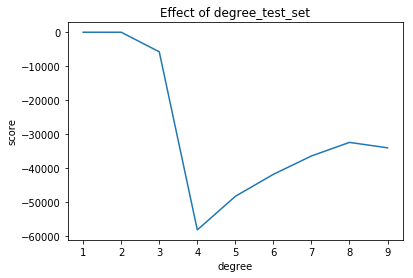

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.multioutput import MultiOutputRegressor
# poly_reg = PolynomialFeatures(degree = 5)
# X_train_poly = poly_reg.fit_transform(X_train)
# X_test_poly = poly_reg.fit_transform(X_test)
# # Must create new linear regresstion model
# lin_reg2 = LinearRegression()
# lin_reg2.fit(X_train_poly, y_train)
# Must create new linear regresstion model


degrees = np.arange(1, 10, 1)
scores = []
for n in degrees:
    poly_reg = PolynomialFeatures(degree = 1)
    poly_reg.set_params(degree = n)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    
    lin_reg2 = MultiOutputRegressor(LinearRegression())
    lin_reg2.fit(X_train_poly, y_train)
    
    scores.append(lin_reg2.score(X_test_poly, y_test))

plt.title("Effect of degree_test_set")
plt.xlabel("degree")
plt.ylabel("score")
plt.plot(degrees, scores)
print('maximum score : ', np.max(scores))
print('max scored degree : ', degrees[np.where(scores == np.max(scores))])
#degree : 2 에서 최적의 score를 얻을 수있다.

maximum score :  0.9895819014932105
max scored degree :  [7]


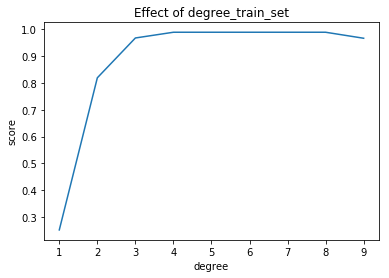

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.multioutput import MultiOutputRegressor
# poly_reg = PolynomialFeatures(degree = 5)
# X_train_poly = poly_reg.fit_transform(X_train)
# X_test_poly = poly_reg.fit_transform(X_test)
# # Must create new linear regresstion model
# lin_reg2 = LinearRegression()
# lin_reg2.fit(X_train_poly, y_train)


degrees = np.arange(1, 10, 1)
scores = []
for n in degrees:
    poly_reg = PolynomialFeatures(degree = 1)
    poly_reg.set_params(degree = n)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    
    lin_reg2 = MultiOutputRegressor(LinearRegression())
    lin_reg2.fit(X_train_poly, y_train)
    
    scores.append(lin_reg2.score(X_train_poly, y_train))

plt.title("Effect of degree_train_set")
plt.xlabel("degree")
plt.ylabel("score")
plt.plot(degrees, scores)
print('maximum score : ', np.max(scores))
print('max scored degree : ', degrees[np.where(scores == np.max(scores))])
#degree : 2 에서 최적의 score를 얻을 수있다.

In [17]:
#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)
# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
lin_reg2 = MultiOutputRegressor(Ridge(alpha = 10))
lin_reg2.fit(X_train_poly, y_train)


#Score
r2_train_poly = lin_reg2.score(X_train_poly, y_train)
r2_test_poly = lin_reg2.score(X_test_poly, y_test)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_poly, r2_test_poly))

R2 - Train : 0.554, Test: 0.328


In [18]:
#Lasso

#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)
# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Lasso
lin_reg2 = MultiOutputRegressor(Lasso(alpha = 0.1))
lin_reg2.fit(X_train_poly, y_train)


#Score
r2_train_poly = lin_reg2.score(X_train_poly, y_train)
r2_test_poly = lin_reg2.score(X_test_poly, y_test)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_poly, r2_test_poly))

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceW

R2 - Train : 0.241, Test: 0.131


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [19]:
#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)
# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
lin_reg2 = MultiOutputRegressor(LinearRegression())
lin_reg2.fit(X_train_poly, y_train)


#Score
r2_train_poly = lin_reg2.score(X_train_poly, y_train)
r2_test_poly = lin_reg2.score(X_test_poly, y_test)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_poly, r2_test_poly))


R2 - Train : 0.787, Test: 0.701


In [20]:
#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]


# # Fitting Polynominal Regression to the dataset
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.linear_model import LinearRegression


# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
lin_reg2 = MultiOutputRegressor(LinearRegression())
lin_reg2.fit(X_train_poly, y_train)

y_test_pred_mor = lin_reg2.predict(X_test_poly)
#MSE를 통한 최적조건
result = []

for i in range(len(X_test)):
   
    mean = np.mean(y_test_pred_mor[i])
    sqrerr = np.asarray(mean - y_test_pred_mor[i])**2
    cost = (1/2)*np.sum(sqrerr)
    result = np.append(result, cost)

print(np.where(result == np.min(result)))
print(result[np.where(result == np.min(result))])
print(X_test.iloc[result[np.where(result == np.min(result))],:])
print('std : ',np.std(y_test_pred_mor[np.where(result == np.min(result))]))
print('min : ',np.min(y_test_pred_mor[np.where(result == np.min(result))]))
print('max : ',np.max(y_test_pred_mor[np.where(result == np.min(result))]))
print('mean : ',np.mean(y_test_pred_mor[np.where(result == np.min(result))]))
print('Y : ',y_test_pred_mor[np.where(result == np.min(result))])


#Mean를 통한 최적조건
result2 = []
for i in range(len(X_test)):
    mean = np.mean(y_test_pred_mor[i])
    
    result2 = np.append(result2, mean)

print(np.where(result2 == np.min(result2)))
print(result[np.where(result2 == np.min(result2))])
print(X_test.iloc[result[np.where(result2 == np.min(result2))],:])
print('std : ',np.std(y_test_pred_mor[np.where(result2 == np.min(result2))]))
print('min : ',np.min(y_test_pred_mor[np.where(result2 == np.min(result2))]))
print('max : ',np.max(y_test_pred_mor[np.where(result2 == np.min(result2))]))
print('mean : ',np.mean(y_test_pred_mor[np.where(result2 == np.min(result2))]))
print('Y : ',y_test_pred_mor[np.where(result2 == np.min(result2))])

#Max를 통한 최적조건
result3 = []
for i in range(len(X_test)):
    pred_max = np.max(np.abs(y_test_pred_mor[i]))
    
    result3 = np.append(result3, pred_max)

print(np.where(result3 == np.min(result3)))
print(result[np.where(result3 == np.min(result3))])
print(X_test.iloc[result[np.where(result3 == np.min(result3))],:])
print('std : ',np.std(y_test_pred_mor[np.where(result3 == np.min(result3))]))
print('min : ',np.min(y_test_pred_mor[np.where(result3 == np.min(result3))]))
print('max : ',np.max(y_test_pred_mor[np.where(result3 == np.min(result3))]))
print('mean : ',np.mean(y_test_pred_mor[np.where(result3 == np.min(result3))]))
print('Y : ',y_test_pred_mor[np.where(result3 == np.min(result3))])




(array([89], dtype=int64),)
[0.20960358]
        temp_zone7_10  temp_zone7_12  temp_zone7_14  temp_zone7_16  \
3                                                                    
899662          725.0          725.0          725.0          725.0   

        temp_zone7_6  temp_zone7_8  temp_zone8_25  temp_zone8_27  \
3                                                                  
899662         725.0         725.0          736.0          736.0   

        temp_zone8_29  temp_zone8_31  temp_zone8_33  temp_zone8_35  
3                                                                   
899662          730.0          730.0          735.0          736.0  
std :  0.16717399425786786
min :  0.02722728355547588
max :  0.6473078269418693
mean :  0.3450760432706829
Y :  [[0.31249821 0.45328138 0.64730783 0.37194942 0.50184077 0.35077028
  0.02722728 0.25276767 0.03502832 0.40571437 0.24566572 0.51331225
  0.50063606 0.21084243 0.34729867]]
(array([39], dtype=int64),)
[0.26516642]
        te

In [21]:
result

array([1.47513668, 1.04949764, 0.58193189, 0.60808757, 1.05007074,
       1.60041305, 1.41400096, 0.8558424 , 1.30581244, 1.95680931,
       0.69710961, 0.69736311, 1.20346511, 0.550198  , 1.4250334 ,
       0.89054656, 1.44713068, 0.43305361, 1.3504885 , 0.70092687,
       0.56119243, 1.33192291, 1.1186173 , 0.67362051, 1.75425781,
       0.67046043, 1.60446166, 1.03602872, 0.40594394, 1.71877606,
       1.55171428, 1.36777385, 1.48823485, 0.49254425, 1.2380258 ,
       0.61468767, 0.36718906, 1.55251587, 1.47609502, 0.26516642,
       0.31234016, 1.04800193, 0.59063027, 1.17579551, 0.82349074,
       1.0857507 , 0.82641558, 0.54581025, 1.65085367, 1.61921284,
       0.5154137 , 0.73084245, 0.48718361, 1.13315055, 1.04078422,
       0.57935395, 0.950036  , 0.80924184, 1.48286471, 1.32867278,
       0.61486023, 0.32875124, 0.65538081, 0.58193189, 1.03955353,
       1.27016244, 0.35791225, 0.29838635, 0.83615747, 0.68430753,
       0.92458128, 1.29490785, 1.44461323, 1.76684278, 1.27568

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.092080e-29
  overwrite_a=True).T


R2 - Train : 0.681, Test: 0.698


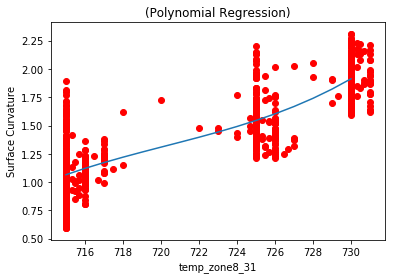

In [9]:
#x,y값 재추출
# x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
#        'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
#        'temp_zone8_33', 'temp_zone8_35']]
x = xy[['temp_zone8_31']]
y = xy[['H']]

# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
from sklearn.linear_model import Ridge
lin_reg2 = Ridge(alpha=1)
lin_reg2.fit(X_train_poly, y_train)


#Score
r2_train_poly = lin_reg2.score(X_train_poly, y_train)
r2_test_poly = lin_reg2.score(X_test_poly, y_test)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_poly, r2_test_poly))

prediction = lin_reg2.predict(X_test_poly)

# Visualising the Polynomial Regression result
X_grid = np.arange(np.min(X_train), np.max(X_train), 1)
X_grid = X_grid.reshape((len(X_grid),1))
#X_grid:그래프를 좀더 스무스하게 만들어줌
plt.scatter(x,y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)))
plt.title("(Polynomial Regression)")
plt.xlabel("temp_zone8_31")
plt.ylabel("Surface Curvature")
plt.show()

R2 - Train : 0.681, Test: 0.698


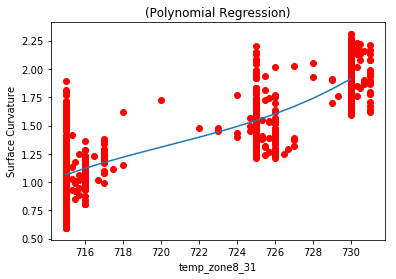

In [10]:
#x,y값 재추출
# x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
#        'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
#        'temp_zone8_33', 'temp_zone8_35']]
x = xy[['temp_zone8_31']]
y = xy[['H']]

# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_poly, y_train)


#Score
r2_train_poly = lin_reg2.score(X_train_poly, y_train)
r2_test_poly = lin_reg2.score(X_test_poly, y_test)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_poly, r2_test_poly))

prediction = lin_reg2.predict(X_test_poly)

# Visualising the Polynomial Regression result
X_grid = np.arange(np.min(X_train), np.max(X_train), 1)
X_grid = X_grid.reshape((len(X_grid),1))
#X_grid:그래프를 좀더 스무스하게 만들어줌
plt.scatter(x,y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)))
plt.title("(Polynomial Regression)")
plt.xlabel("temp_zone8_31")
plt.ylabel("Surface Curvature")
plt.show()

R2 - Train : 0.054, Test: 0.074


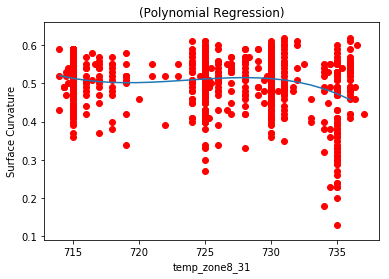

In [24]:
#x,y값 재추출
# x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
#        'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
#        'temp_zone8_33', 'temp_zone8_35']]
x = xy[['temp_zone8_25']]
y = xy[['B']]

# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

# Fitting Polynominal Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 8)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
# Must create new linear regresstion model
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_poly, y_train)


#Score
r2_train_poly = lin_reg2.score(X_train_poly, y_train)
r2_test_poly = lin_reg2.score(X_test_poly, y_test)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_poly, r2_test_poly))

prediction = lin_reg2.predict(X_test_poly)

# Visualising the Polynomial Regression result
X_grid = np.arange(np.min(X_train), np.max(X_train), 1)
X_grid = X_grid.reshape((len(X_grid),1))
#X_grid:그래프를 좀더 스무스하게 만들어줌
plt.scatter(x,y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)))
plt.title("(Polynomial Regression)")
plt.xlabel("temp_zone8_31")
plt.ylabel("Surface Curvature")
plt.show()